# Como predecir la rotacion de empleados 
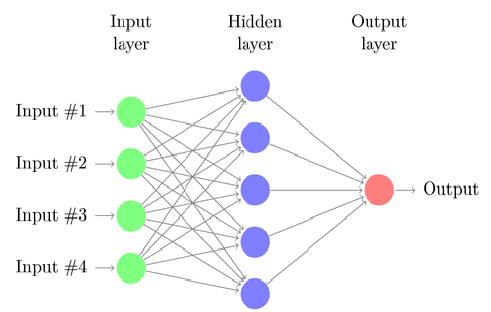

#### Formulación de Problema o Hipótesis
    - Que es la Rotacion ? 
    - Por que es importante? 
    - Que podrian ser las posibles casusas? 
#### Exploración de los datos
    - Que factores tienen un mayor efecto en la rotacion ? 
#### Limpieza y transformación 
    - Limpieza - Deben Ser transformados? 
#### Ingeniería de Factores
    - Ingieneria de Factores
    - Factores Categoricos Vs. Numericos 
    - One-hot enconding vectors vs Dummy Variables 
#### Modelo o Modelos
    - Red Neural - Perceptron Multi Capas (MLP - Multilayer Perceptron)
#### Reporte o Aplicación 
    - Como se entregan estos insights al cliente? 

## Formulación de Problema o Hipótesis
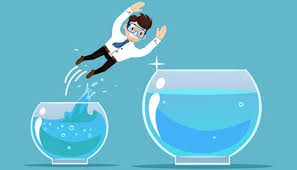
### _Que_ es la Rotacion ? 
- La rotacion de empleados se caracteriza como:
    - la rotracion de empleados se caracteriza como la salida de un empleado de la fuerza de trabajo y la cantidad dividida entre el total de empleados </p>
- Por que es importante? 
    - La industria maquiladora en Ciudad Juarez, gasta alrededor de 100 millones de dolares al año en problemas de Rotacion. 
- Que podrian ser las posibles casusas? 
    - Muchas veces, la rotacion se debe a la falta de un buen liderazgo, pero hay otros factores que puedan tambien ser de importancia para determinar el por que un empleado decide retirarse. 

In [2]:
# Librerias 

# datos
import pandas as pd
import numpy as np

# Visualizacion 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

# Modelo
# sklearn

from sklearn.model_selection import train_test_split
# keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.optimizers import SGD


# APP (si posible)

Using TensorFlow backend.


# Exploración de los datos
    - Que factores tienen un mayor efecto en la rotacion ? 
##### Leyendo los Datos

- Datos inventados por IBM - Rotacion de Empleados 

In [3]:
# datos, Formato CSV - Comma Separated Value 

df = pd.read_csv('IBM.csv',header=0,sep=',') # takes in a file, header position and separation
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,Yes,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,Yes,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# informacion sobre los datos basica

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 35 columns):
Age                         6214 non-null int64
Attrition                   6214 non-null object
BusinessTravel              6214 non-null object
DailyRate                   6214 non-null int64
Department                  6214 non-null object
DistanceFromHome            6214 non-null int64
Education                   6214 non-null int64
EducationField              6214 non-null object
EmployeeCount               6214 non-null int64
EmployeeNumber              6214 non-null int64
EnvironmentSatisfaction     6214 non-null int64
Gender                      6214 non-null object
HourlyRate                  6214 non-null int64
JobInvolvement              6214 non-null int64
JobLevel                    6214 non-null int64
JobRole                     6214 non-null object
JobSatisfaction             6214 non-null int64
MaritalStatus               6214 non-null object
MonthlyIncome         

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,6214.000000,6214.000000,6214.000000,6214.000000,6214.0,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,...,6214.000000,6214.0,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000
mean,36.829096,804.819923,9.310911,2.898616,1.0,3107.500000,2.721918,65.940296,2.741229,2.048278,...,2.724493,80.0,0.787255,11.196653,2.816865,2.759897,6.981654,4.199549,2.168008,4.128420
std,9.135552,404.269415,8.141764,1.024890,0.0,1793.971618,1.102466,20.335773,0.716760,1.108729,...,1.076230,0.0,0.849987,7.746400,1.291655,0.696935,6.096281,3.597497,3.177070,3.571971
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,1554.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,805.000000,7.000000,3.000000,1.0,3107.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1167.000000,15.000000,4.000000,1.0,4660.750000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,34.000000,5.000000,1.0,6214.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [291]:
# Variables numericas, las podemos graficar para conocer su distribucion en general
# variables numericas
# extraccion de variables numericas 
# los DataFrames de Pandas tienen lo que se llama indice y se pueden extrer ciertos valores
# tambien los DataFrames de Pandas permiten usar metodos para extraer mayor informacion 
data_types = df.dtypes
print(data_types[:5])
print((df.dtypes == 'int64')[:5])

# finalmente creamos un indice con las variable numericas
# la palabra keys() nos permite accesar a los nombres bajo los cuales estan guardados los valores 
num_vars = df.dtypes[df.dtypes == 'int64'].keys()
print(num_vars)

Age                int64
Attrition         object
BusinessTravel    object
DailyRate          int64
Department        object
dtype: object
Age                True
Attrition         False
BusinessTravel    False
DailyRate          True
Department        False
dtype: bool
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'binary_rot'],
      dtype='object')


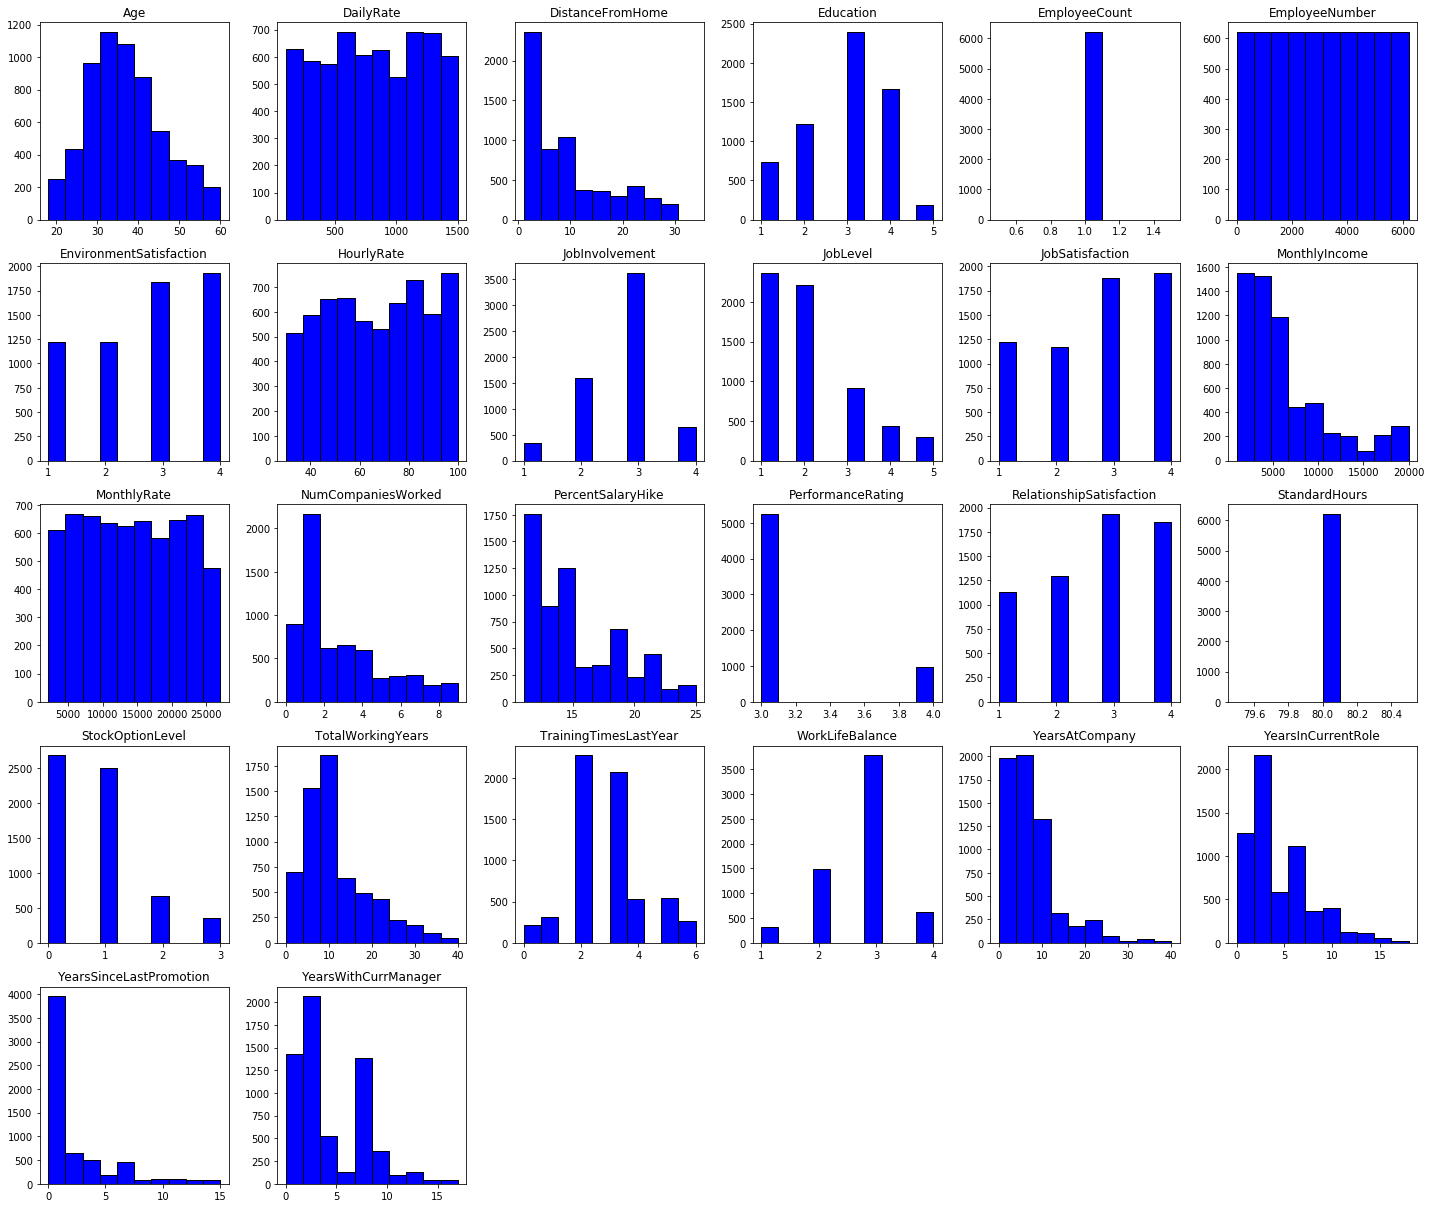

In [7]:
# variables numericas histograma
# creamos un figura de 20 x 20 pixeles 
plt.figure(figsize=(20,20))

# creamos un for loop para iterar sobre las variables numericas
for idx,i in enumerate(num_vars):
    plt.subplot(6,6,idx+1)
    # podemos indexar el nombre de la variable numerica para extraer sus valores y asi graficar un histograma
    plt.hist(df[i],ec='k',color='b')
    plt.title(i)

    
plt.tight_layout()
plt.show()

In [8]:
# variables numericas contra la rotacion 
# primero tenemos que convertir la rotacion a una variable numerica
# hay tres maneras de hacer esto: 

# primero la convertimos a una variable binaria donde si = 1, no = 0
print('Ejemplo de valores en Variable Rotacion: ')
display.display(df['Attrition'].head())

# podemos convertir la variable a binaria
rot_bin = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
print('Variable de Rotacion binaria')
display.display(rot_bin.head())

# La segunda forma es de convertila en una matriz binaria 
rot_dummy = pd.get_dummies(df.Attrition)
print('Matriz Binaria: ')
display.display(rot_dummy.head())

# la tercera manera es convertila en lo que llamamos un vector binario 
ohv_rot = to_categorical(rot_bin)
print('Vector Binario: \n')
print(ohv_rot[:5])


Ejemplo de valores en Variable Rotacion: 


0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: Attrition, dtype: object

Variable de Rotacion binaria


0    1
1    1
2    1
3    1
4    0
Name: Attrition, dtype: int64

Matriz Binaria: 


,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


Vector Binario: 

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [9]:
# para comprar la variable de rotacion con las variables numericas
# Nuestra mejor opccion es la variable de rotacion binaria 
# esta variable la agregamos a nuestro Datos 

df['binary_rot'] = rot_bin
df.binary_rot.head()

0    1
1    1
2    1
3    1
4    0
Name: binary_rot, dtype: int64

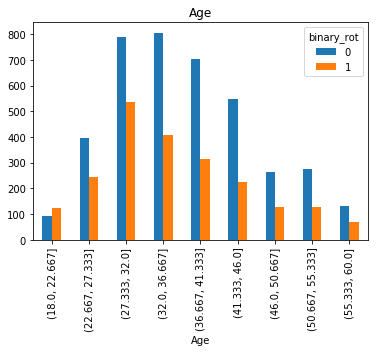

In [10]:
# esta variable binaria la podemos comparar con nuestras variables numericas 
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
pd.crosstab(pd.cut(df.Age,bins),df.binary_rot).plot(kind='bar')
plt.title('Age')
plt.show()

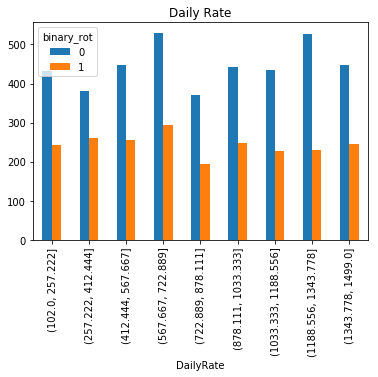

In [11]:
# comparando todas las variables 
bins = np.linspace(df.DailyRate.min(),df.DailyRate.max(),10)
pd.crosstab(pd.cut(df.DailyRate,bins),df.binary_rot).plot(kind='bar')
plt.title('Daily Rate')
plt.show()

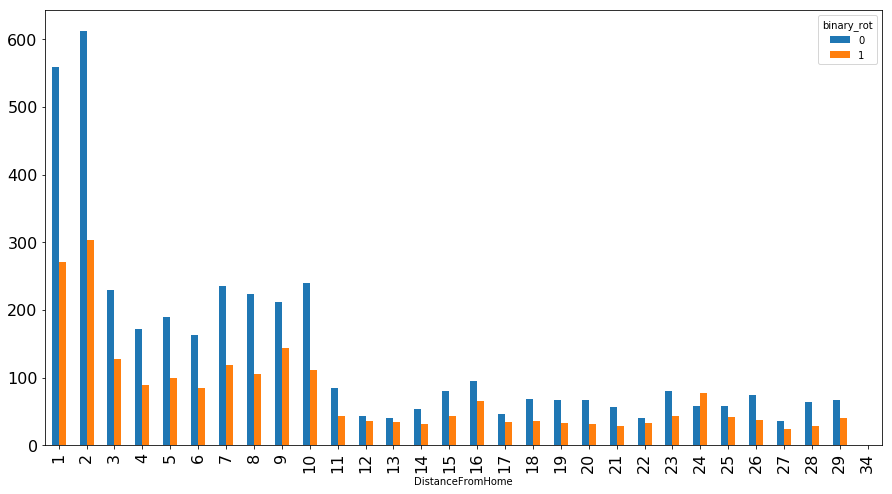

In [12]:
# Distancia 
d = pd.crosstab(df.DistanceFromHome,df.binary_rot)
d.plot.bar(figsize=(15,8))
#axes = df.plot.bar(rot=0, subplots=True)
#axes[1].legend(loc=2) 
plt.tick_params(labelsize=16)
plt.show()

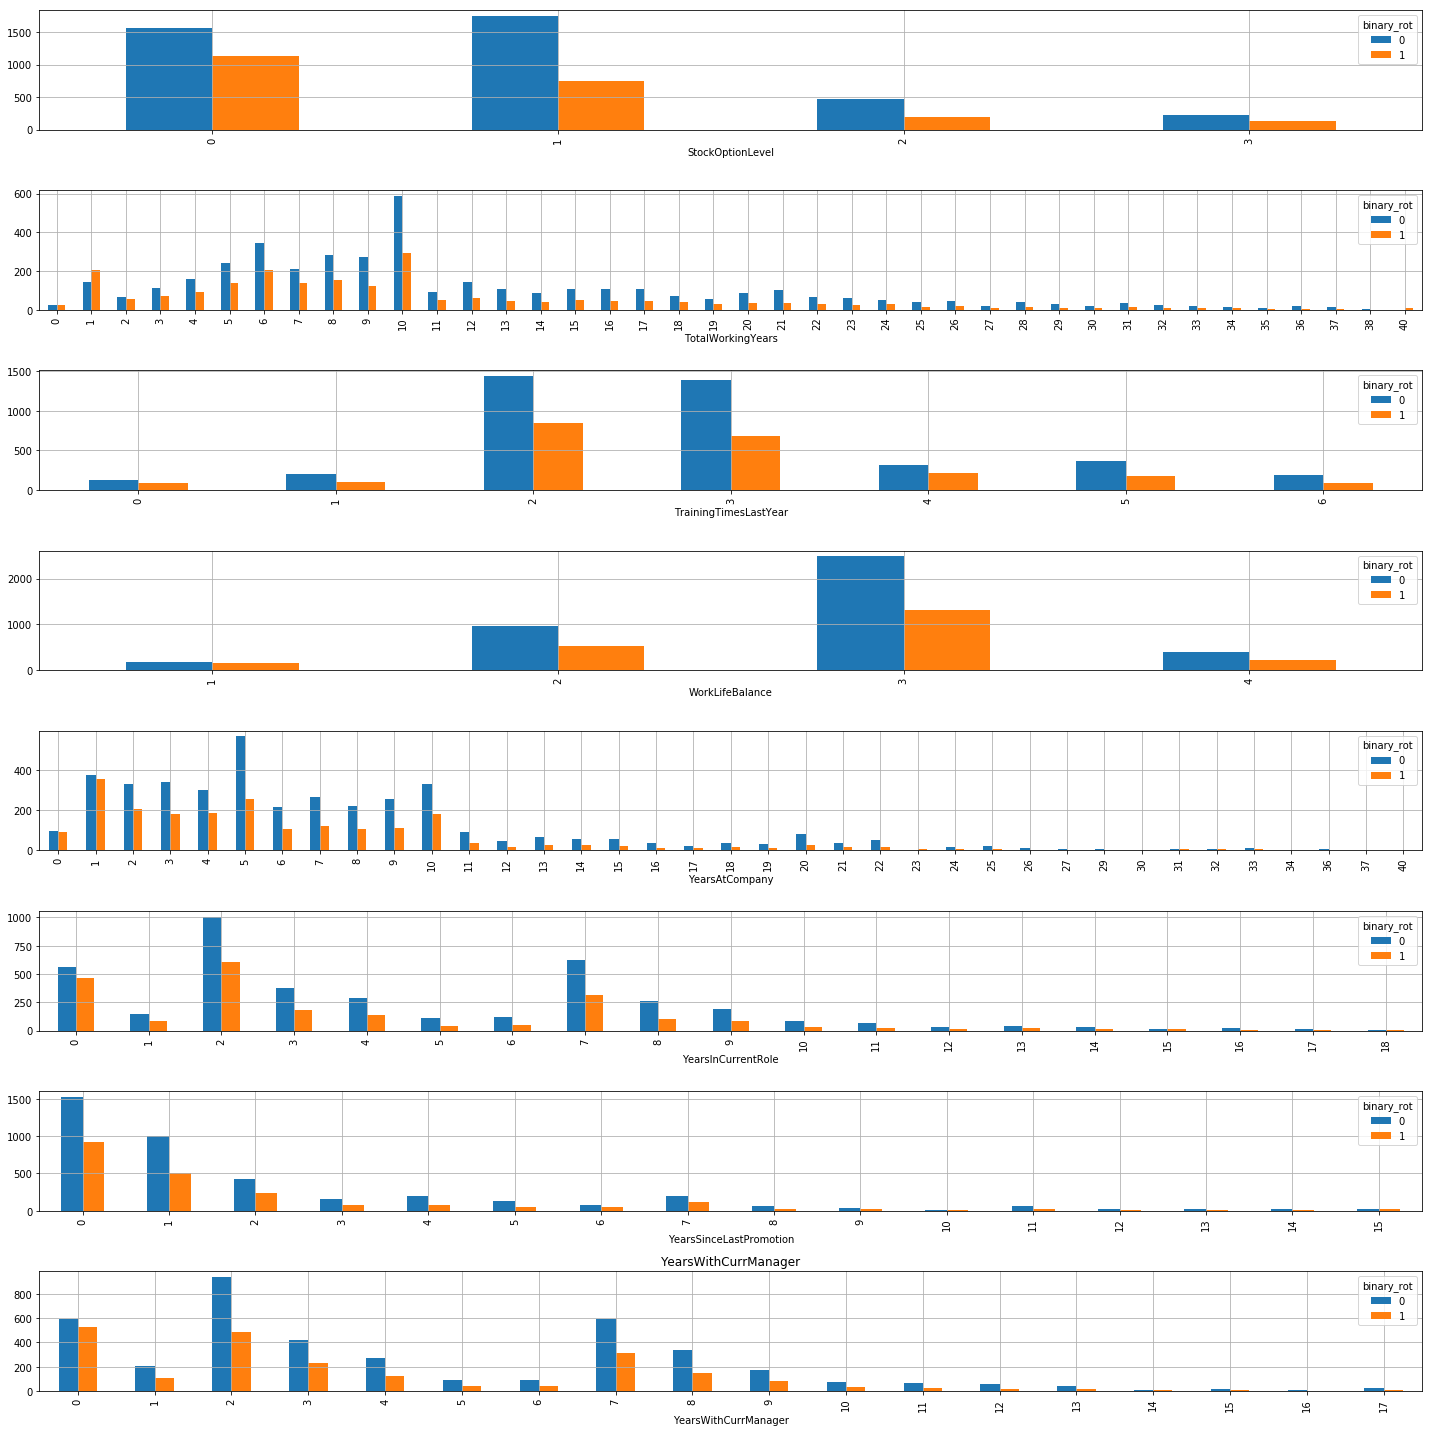

In [57]:
fig, axes = plt.subplots(figsize=(20,20),nrows=8, ncols=1)
#for idx, i in enumerate(num_vars[8:11])
#for idx, i in enumerate(num_vars[16:17])
for idx, i in enumerate(num_vars[18:26]):
    pd.crosstab(df[i],df.binary_rot).plot(ax=axes[idx],kind='bar',grid=True)
    axes[idx].set_label('{}'.format(i))
    plt.title('{}'.format(i))

plt.tight_layout()
#display.display(df[num_vars[18:26]])

# observaciones de variables numericas 
    - Edad = 22 - 46
    - Daily Rate = No Realmente 
    - Distancia, curiosamente los que viven mas cerca 

In [58]:
# extraccion de variables categoricas 
# variables categoricas

cat_vars = df.dtypes[df.dtypes == 'O'].keys()
cat_vars

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

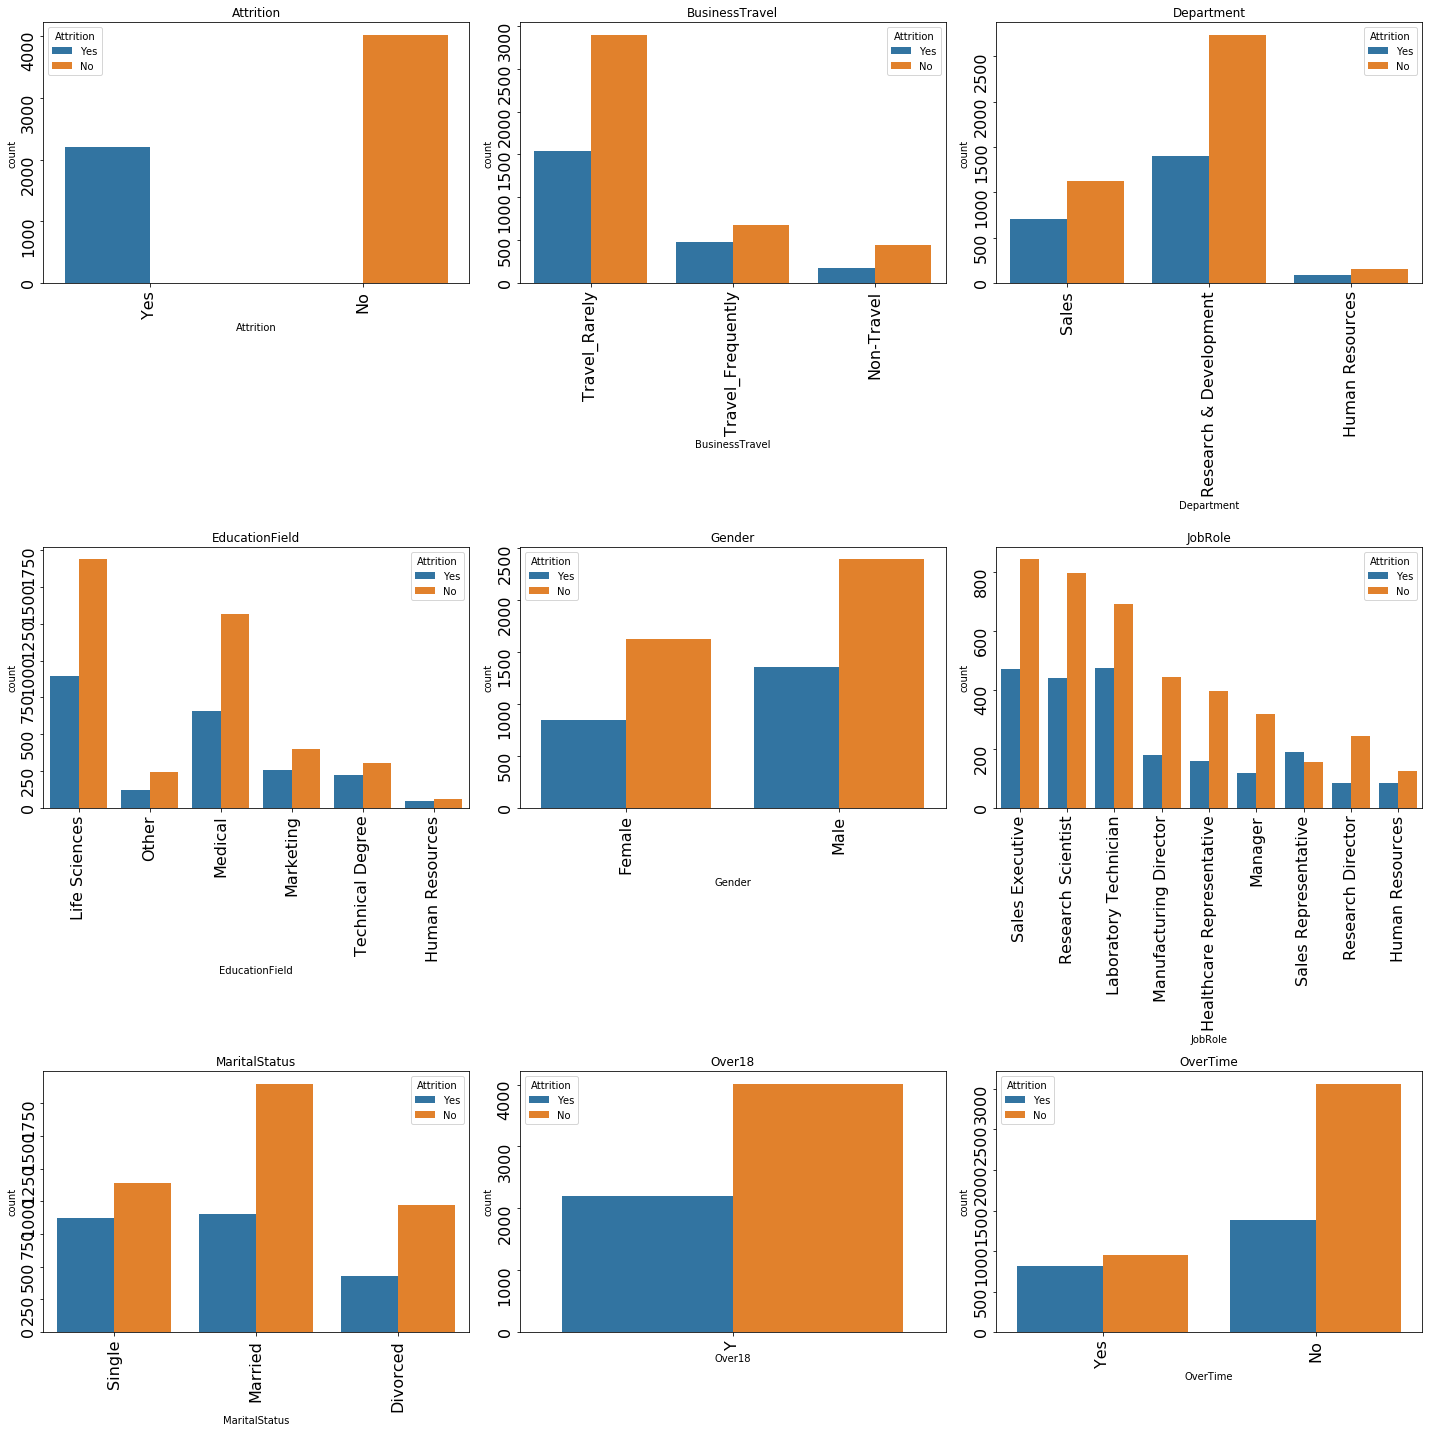

In [59]:
# las variables categoricas son solamente 9, en este caso no podemos graficar su distribucion 
# Podemos graficar un conteo de las variables y comprarlo a la variable de rotacion 

# figura 20 x 20 
plt.figure(figsize=(20,20))

# for loop para iterar por las variables numericas
for idx,i in enumerate(cat_vars):
    plt.subplot(3,3,idx+1)
    # grafica para contar valores y compararlo con nivel de rotacion 
    sns.countplot(data=df, x=i, hue='Attrition')
    plt.title('{}'.format(i))
    plt.tick_params(rotation=90,labelsize=16)

plt.tight_layout()
plt.show()

## Observaciones de variables Categoricas 

#### encontramos que: 
    - los empleados que viajan rara vez, presentan mayor numero de rotacion 
    - Las personas en el departamento de R&D presentan un mayor numero de rotacion que los otros departamentos
    - Quienes estudiaron medicina o ciencias de la vida = alto indice de rotacion
        - por que? Mas oportunidades? salario mas competitivo?
    - Hay mas hombres que dejan el puesto de trabajo 
    - Posiciones con mas alto indice = Ventas, Investigacion y Tecnicos de laboratorio 
   

# transformacion e ingineria de factores

In [73]:
# las variables categoricas deben ser transformadas a matrices de variables 
# la trasnformacion nos ayudara a poder pasarlas como argumentos 
# transformacion variables cateoricas p
vars_dm = cat_vars[1:]
cat_vars_df = pd.get_dummies(df[vars_dm],prefix=[str(i) for i in vars_dm])
cat_vars_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


# Variables numericas, categoricas y vector de unos 

In [292]:
# eliminamos el numero de empleado como variable 
# num_vars = num_vars[num_vars.values != 'EmployeeNumber']
num_vars = num_vars[(num_vars.values!='binary_rot')]
num_vars

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [293]:
# extraemos las variables numericas 
num_vars_df = df[num_vars]

# variables numericas y variables categoricas en un solo DataFrame
master_df = pd.concat([cat_vars_df,num_vars_df],axis=1)
master_df.head()



,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,...,1,80,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,...,4,80,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,0,0,0,...,2,80,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,...,3,80,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,0,0,0,1,...,4,80,1,6,3,3,2,2,2,2


In [294]:
# asignacion de variables para entrenamieto y variable objetiva 

print(master_df.shape,ohv_rot.shape)

(6214, 55) (6214, 2)


In [295]:
X = master_df
y = df.binary_rot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3604, 55) (3604,)
(2610, 55) (2610,)


# Modelo Predictivo - RNNA (MLP - Multilayer Perceptron)

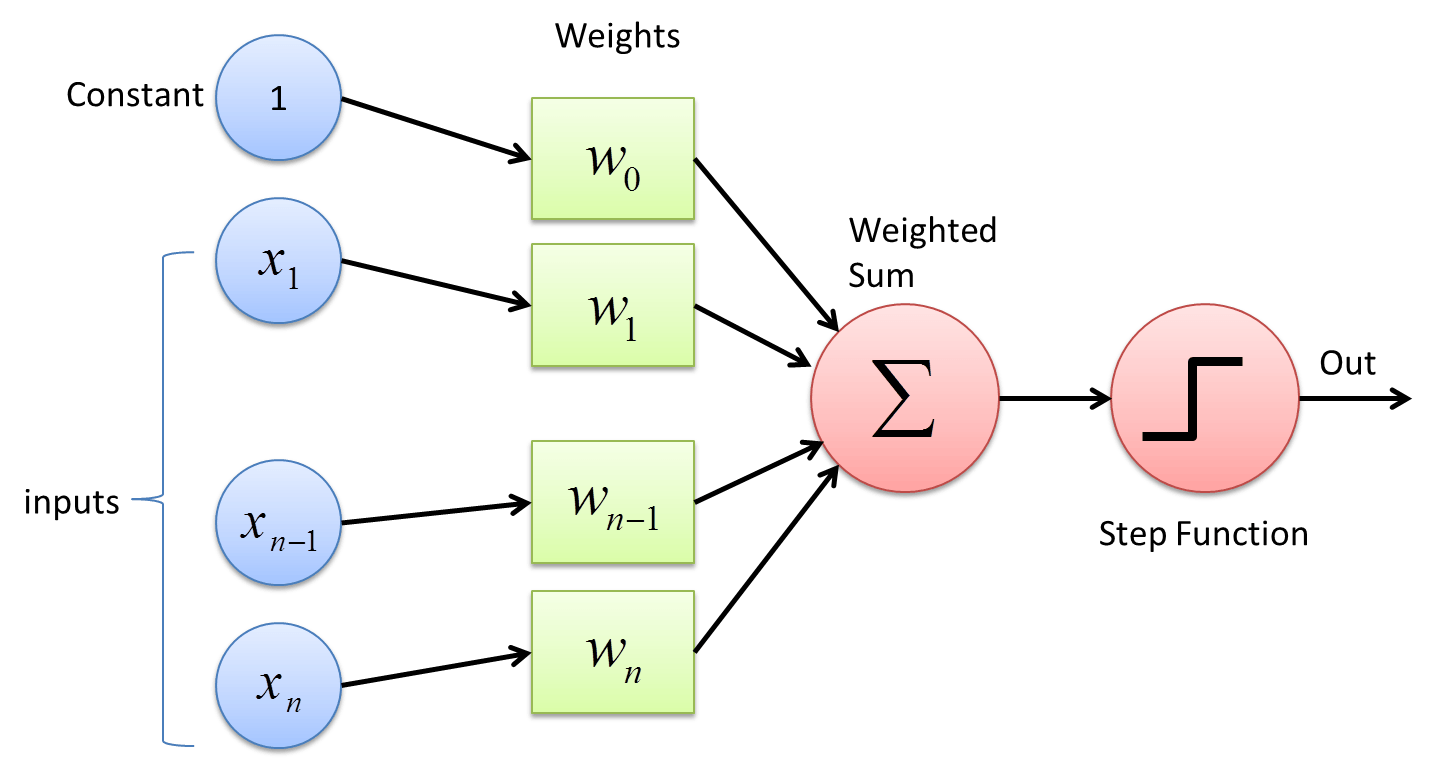

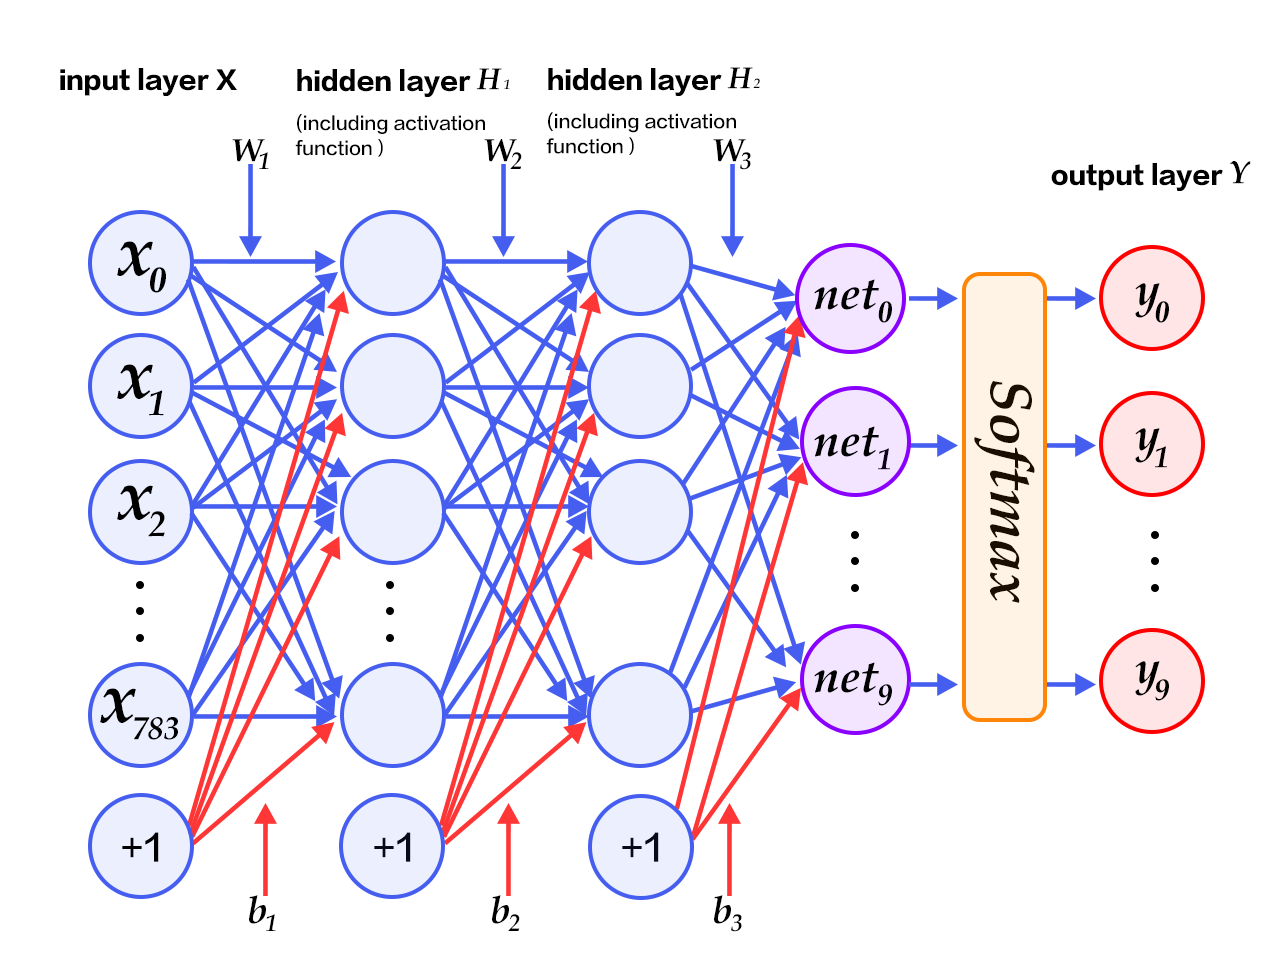

### Recordatorios 

- **Gradiente Descendente**: Optimizacion para encontrar el minimo en la funcion.

- w representa el peso y J(w) representa la perdida o funcion de costo


![image.png](attachment:image.png)

##### Mini-Batch 
Muchas veces, se ocupan batches de datos para evitar que el tiempo de entrenamiento sea tan lento. 



In [296]:
num_labels = len(np.unique(y_train))
print(num_labels)
# Convert to one-hot vectors 

y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)
print(y_train_one.shape,y_test_one.shape)
input_size = X_train.shape[1]
print(input_size)

2
(3604, 2) (2610, 2)
55


In [298]:
# Network Parameters

batch_size = int(input('Enter Batch Size: '))
h1 = 100
h2 = 100
dropout = 0.45

# model is a 3 layer MLP with ReLU as the activation function and dropout after each layer 
# relu as activatio = relu(x) = max(0,x)
# other activations such as elu, selu, softplus, sigmoid, tanh
# softplus(x) = log(1+e**x)
# Exponential Linear Unit = elu = elu(x,a) = x if x > 0 else a(e**x - 1), where a is a hyperparameter
# Scaled  Exponential Linear Unit = selu = selu(x) = K * elu(x,a), 
# where k = a costant, (google) and a is also a constant(google)


model = Sequential()

# input layer and regularization
# the network can be regularized 
model.add(Dense(h1,kernel_regularizer=l1(0.01),input_dim=input_size))
model.add(Activation('tanh'))


# first hidden layer 
model.add(Dense(h1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# second hidden layer 
model.add(Dense(h2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# output layer, softmax activation for the output 
# softmax can be expressend as softmax(xi) = (e**xi/sum,j=0,n-1(e**xj)) xi outputs = 0,1,...,9 ; xj are the outputs probs
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
#plot_model(model, to_file='mlp-mnist.png',show_shapes=True)

# loss function for one hot vector encoding 
# Adam optimizer 
# Accuracy as metric
# cross_entropy loss = logloss

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# train the network 
model.fit(X_train,y_train_one, epochs=20, batch_size=batch_size)

# validate the model on test set

loss, acc = model.evaluate(X_test,y_test_one, batch_size=batch_size)
print('Test Loss {}'.format(loss))
print('Test Accuracy {:.02f}'.format(acc * 100))
y_pred = model.predict(X_test)
print(y_pred[:5])

Enter Batch Size: 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 100)               5600      
_________________________________________________________________
activation_155 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_158 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_156 (Activation)  (None, 100)               0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_159 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_157 (Activation)  (None, 100)              

# Mejorando el Modelo 

- Si observamos el DataFrame podemos ver que algunos datos numericos tienen numeros bastante grandes:
    - DailyRate
    - HourlyRate
    - MonthlyIncome
    - MonthlyRate
- Podemos Escalarlos y eso mejorara el modelo 

In [300]:
master_df[num_vars].describe(include='all')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,6214.000000,6214.000000,6214.000000,6214.000000,6214.0,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,...,6214.000000,6214.0,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000
mean,36.829096,804.819923,9.310911,2.898616,1.0,3107.500000,2.721918,65.940296,2.741229,2.048278,...,2.724493,80.0,0.787255,11.196653,2.816865,2.759897,6.981654,4.199549,2.168008,4.128420
std,9.135552,404.269415,8.141764,1.024890,0.0,1793.971618,1.102466,20.335773,0.716760,1.108729,...,1.076230,0.0,0.849987,7.746400,1.291655,0.696935,6.096281,3.597497,3.177070,3.571971
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,1554.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,805.000000,7.000000,3.000000,1.0,3107.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1167.000000,15.000000,4.000000,1.0,4660.750000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,34.000000,5.000000,1.0,6214.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [301]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mms = MinMaxScaler()

master_df.DailyRate = mms.fit_transform(master_df.DailyRate.values.reshape(6214,1))
master_df.HourlyRate = mms.fit_transform(master_df.HourlyRate.values.reshape(6214,1))
master_df.MonthlyIncome = mms.fit_transform(master_df.MonthlyIncome.values.reshape(6214,1))
master_df.MonthlyRate = mms.fit_transform(master_df.MonthlyRate.values.reshape(6214,1))
master_df[num_vars].head()

C:\Users\mjcastaneda4\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mjcastaneda4\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mjcastaneda4\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mjcastaneda4\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.715820,1,2,1,1,2,0.914286,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0.126700,8,1,1,2,3,0.442857,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.909807,2,2,1,3,4,0.885714,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0.923407,3,4,1,4,4,0.371429,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,0.350036,2,1,1,5,1,0.142857,3,1,...,4,80,1,6,3,3,2,2,2,2


In [302]:
bins = np.linspace(master_df.Age.min(),master_df.Age.max(),10)
master_df.Age = pd.cut(master_df.Age,bins)

In [303]:
master_df.Age.head()

0    (36.667, 41.333]
1      (46.0, 50.667]
2    (36.667, 41.333]
3      (32.0, 36.667]
4    (22.667, 27.333]
Name: Age, dtype: category
Categories (9, interval[float64]): [(18.0, 22.667] < (22.667, 27.333] < (27.333, 32.0] < (32.0, 36.667] ... (41.333, 46.0] < (46.0, 50.667] < (50.667, 55.333] < (55.333, 60.0]]

In [304]:
num_labels = len(np.unique(y_train))
print(num_labels)
# Convert to one-hot vectors 

y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)
print(y_train_one.shape,y_test_one.shape)
input_size = X_train.shape[1]
print(input_size)

2
(3604, 2) (2610, 2)
55


In [305]:
# Network Parameters

batch_size = int(input('Enter Batch Size: '))
h1 = 100
h2 = 100
dropout = 0.45

# model is a 3 layer MLP with ReLU as the activation function and dropout after each layer 
# relu as activatio = relu(x) = max(0,x)
# other activations such as elu, selu, softplus, sigmoid, tanh
# softplus(x) = log(1+e**x)
# Exponential Linear Unit = elu = elu(x,a) = x if x > 0 else a(e**x - 1), where a is a hyperparameter
# Scaled  Exponential Linear Unit = selu = selu(x) = K * elu(x,a), 
# where k = a costant, (google) and a is also a constant(google)


model = Sequential()

# input layer and regularization
# the network can be regularized 
model.add(Dense(h1,kernel_regularizer=l1(0.01),input_dim=input_size))
model.add(Activation('tanh'))


# first hidden layer 
model.add(Dense(h1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# second hidden layer 
model.add(Dense(h2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# output layer, softmax activation for the output 
# softmax can be expressend as softmax(xi) = (e**xi/sum,j=0,n-1(e**xj)) xi outputs = 0,1,...,9 ; xj are the outputs probs
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
#plot_model(model, to_file='mlp-mnist.png',show_shapes=True)

# loss function for one hot vector encoding 
# Adam optimizer 
# Accuracy as metric
# cross_entropy loss = logloss

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# train the network 
model.fit(X_train,y_train_one, epochs=20, batch_size=batch_size)

# validate the model on test set

loss, acc = model.evaluate(X_test,y_test_one, batch_size=batch_size)
print('Test Loss {}'.format(loss))
print('Test Accuracy {:.02f}'.format(acc * 100))
y_pred = model.predict(X_test)
print(y_pred[:5])

Enter Batch Size: 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 100)               5600      
_________________________________________________________________
activation_159 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_162 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_160 (Activation)  (None, 100)               0         
_________________________________________________________________
dropout_87 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_161 (Activation)  (None, 100)              